<a href="https://colab.research.google.com/github/RJuro/am-notebooks/blob/master/AM2022_exam_ret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eksamen: Anvendt Matematik; 13/4 2022
**Roman Jurowetzki**

Opgaven har 4 dele. (1-2) Lineær algebra og (3-4)calculus.

#### Rules of the game:

- Der afleveres som 👉 `ipynb` (**ikke PDF!**) - dvs., du skal bare downloade den fil du arbejder med fra Colab eller bare aflevere den ipynb fil som du har åbent i Jupyter Lab.
- Du må gerne bruge dine noter, google etc.

- Hvis koden ikke virker (men virkede før). Gå tilbage, og kør oppefra ned. Også en god ide at tjekke, at koden er fejlfri ved at gøre denne øvelse undervejs.
- Hvis du får en fejl, overvej først hvad Python prøver at sige og tjek de forskellige objekter i cellen. Er de, hvad de burde være?
- De fleste kodefejl er dumme stavefejl. Vær omhyggelig med kommaer, punktummer etc.
- Hvis der er noget, som slet ikke kan løses, så kan du bare kommentere ud med `#` (det indgår ikke i bedømmelsen)
- Husk, at output skal kunne ses (f.eks. dine plots)
- Play fair og lad være med at snyde! - Det er nemmere at finde ud hvem der snyder end du tror. 🤓
- Brug objektnavne, der blev defineret i opgaven

In [ ]:
# importer pakker
from sympy import *
import numpy as np
np.set_printoptions(suppress=True)
from scipy import linalg
import matplotlib.pyplot as plt

# 1. Old School Mobilpakker

Der er givet 2 urealistiske mobilpakker med fast månedsgebyr og betaling per minut

1. 44kr månedsgebyr og 6 øre/min
2. 50kr månedsgebyr og 5 øre/min

**OBS - i alle opgaver: Lav så mange nye code-celler, som du har brug for!
Skriv korte "verbale" svar, hvor det giver mening!**

In [ ]:
# 1.1 Hvilken pakke er billigst hvis man taler hhv 1160 og 420 minut / måned?

In [ ]:
p1 = 0.06*1160 + 44
p2 = 0.05*1160 + 50

In [ ]:
print(p1,p2)

113.6 108.0


In [ ]:
p1 = 0.06*420 + 44
p2 = 0.05*420 + 50

In [ ]:
print(p1,p2)

69.2 71.0


In [ ]:
# SVAR: Pakke 2 for 1160 min. ; Pakke 1 for 420 min.

In [ ]:
# 1.2 Plot de 2 lineære funktioner. 
# - Brug np.linspace til at generere x-værdier (fx. x_plot mellem 0 og 1200)
# - Beregn y-værdier i 2 nye objekter (fx. pakke_1; pakke_2)
# brug

In [ ]:
x_plot = np.linspace(0, 1200, num=100)

In [ ]:
pakke_1 = 0.06*x_plot + 44
pakke_2 = 0.05*x_plot + 50

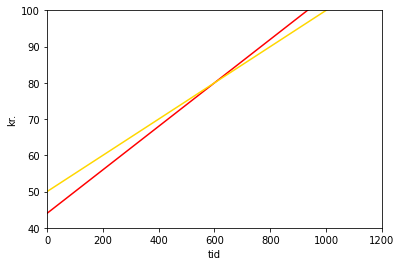

In [ ]:
# Plot; brug "red" og "gold" som farver

plt.axis([0, 1200, 40, 100])
plt.xlabel('tid')
plt.ylabel('kr.')

plt.plot(x_plot, pakke_1, color = "red") # pakke1
plt.plot(x_plot, pakke_2, color = "gold") # pakke2


In [ ]:
# 1.3

# Hvad er den taletid, hvor man i alt betaler det samme som kunde?

# opstil ligningssystemet som augmented matrix 
# og løs ligningssystemet ved at omskrive til række echelon form. 

In [ ]:
augmented = np.array([
[0.06, -1, -44],
[0.05, -1, -50]

])

In [ ]:
augmented[0] = augmented[0]/augmented[0,0]

In [ ]:
augmented[1] = augmented[1] - augmented[1,0]*augmented[0]

In [ ]:
augmented[1] = augmented[1] / augmented[1,1]

In [ ]:
augmented[0] = augmented[0] - augmented[0,1]*augmented[1]

In [ ]:
# print
print(augmented)

[[  1.   0. 600.]
 [ -0.   1.  80.]]


## 1.4 Ny pakke

Der lanceres en ny pakke (pakke_3) med 0 kr. i månedsgebyr. Hvor meget skal det koste (tilnærmelsesvis) per minut for at opnå den samme samlede pris i ligevægt (der beregnes i 1.3)?

Brug svar fra grafisk løsning (1.2), hvis du mangler svar i 1.3

Plot ligningen, der beskriver pakke3 sammen med de 2 andre (pakke1 og pakke2).

In [ ]:
80 / 600

0.13333333333333333

In [ ]:
pakke_3 = (80 / 600)*x_plot

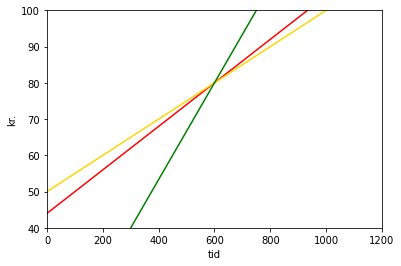

In [ ]:
# Plot
plt.axis([0, 1200, 40, 100])
plt.xlabel('tid')
plt.ylabel('kr.')

plt.plot(x_plot, pakke_1, color = "red") # pakke1
plt.plot(x_plot, pakke_2, color = "gold") # pakke2
plt.plot(x_plot, pakke_3, color = "green") # pakke3

## 1.5 Ændring i Månedsgebyr
Hvordan skal månedsgebyr for Pakke 2 (50kr/md og 5øre/min) ændres, således samlet pris vs pakke 1 er lige ved 500 minutters taletid?

Brug matrix regning til at løse opgaven

Du kan bruge følgende python objekter:


*   $A$: `A`
*   $\vec{b_n}$: `vector_b_n`
* $\vec{x_n}$: `vector_x_n`

In [ ]:
# Definer matrix A
A = np.array([
[0.06, -1],
[0.05, -1]
])

In [ ]:
# Beregn ligevægtspris ved 500 minutter
0.06*500 + 44

74.0

In [ ]:
# definer vector x i ny ligevægt
vector_x_n = np.array([[500],[74]])

In [ ]:
# beregn ny vector b i ny ligevægt
A @ vector_x_n

array([[-44.],
       [-49.]])

#2 Investering

Mathilde arver 210.000 kr. og efter at have set mange YouTube videoer om investering, fordeler hun penge mellem 
Aktier, ETFer og Investeringsforeninger.

Efter et år har det givet følgende afkast: aktier 9.4%, ETF 4.6%, investeringsforeninger 4.25%. I alt tjener Mathilde 13360 kr. efter 1 år. Vi ved derudover, at der blev investeret $50000$ mere i ETF end Investeringsforeninger.

Hvad var fordelingen i Mathildes portefølje?

- Opstil 3 ligninger med 3 ubekendte
- Omskriv til matrix ligning af type
$A\vec{x} = \vec{b}$
- Beregn $\vec{x}$

Du skal bruge følgende Python objekter:


*   $A$: `A2`
*   $A^{-1}$: `A2_inv`
*   $\vec{b}$: `vector_b2`
* $\vec{x}$: `vector_x2`

In [ ]:
A2 = np.array([[1,1,1],
             [0.094,0.046,0.0425],
             [0,1,-1]])

In [ ]:
vector_b2 = np.array([210000,13360,50000]).reshape(-1,1)

In [ ]:
np.linalg.inv(A2) @ vector_b2

array([[80000.],
       [90000.],
       [40000.]])

#3 Produktion

En flyproducent vil bygge en ny produktionslinje til mindre passagerfly.

Der bliver estimeret følgende funktion, som beskriver omkostninger for hver produceret maskine:

$m(x) = 21x-5x^{0.75} +0.01x^2$

Det vil koste 400 at etablere produktion af denne type fly.

Efterspørgsel er estimeret til $p(x) = 330-7.8x$

Derudover:

- $ C(x) = m(x) + \text{faste omkostninger} $
- $ R(x) = p(x) · x $
- Alle tal i mio USD
- x: antal; p: pris

In [ ]:
# 3.1 Opstil ligninger for m(x), C(x), p(x) og R(x)
# brug objekter: m_x; C_x; p_x; R_x

In [ ]:
# brug x og p symboler i denne opgave
x,p = symbols('x,p')

In [ ]:
m_x = 21*x-5*x**0.75+0.01*x**2

In [ ]:
C_x = m_x + 400

In [ ]:
p_x = 330 - 7.8*x

In [ ]:
R_x = p_x * x

In [ ]:
R_x

x*(330 - 7.8*x)

In [ ]:
C_x

-5*x**0.75 + 0.01*x**2 + 21*x + 400

* Marginalomkostninger $MC = C'(x)$ (omkostninger ved at producere +1 enhed)
* Marginalindtægter $MR = R'(x)$ (indtægter ved at sælge +1 enhed)

In [ ]:
# 3.2 Beregn MC og MR (sympy)

In [ ]:
MC = diff(C_x)

In [ ]:
MR = diff(R_x)

In [ ]:
# 3.3 Beregn den profitoptimerende mængde og pris i monopol ved at løse MC = MR ligningen
# Opstil først ligninger MC(x) = p og MR(x) = p som MC_eq og MR_eq ved at bruge "Eq" funktionen.

# beregning af MC = MR med sympy kan tage lidt tid (~30sec)

In [ ]:
MC_eq = Eq(MC,p)
MR_eq = Eq(MR,p)

In [ ]:
solve([MC_eq,MR_eq])

[{p: 19.6223418742077, x: 19.8960037260123}]

#4 Ekstrempunkter

Du er givet følgende funktion:
$F(x) = -\frac{1}{5}  x^3 + 3x^2 - 5x+12 $

OBS: `x`er stadigvæk et Sympy symbol og kan genbruges i denne opgave, hvor det skal bruges som en variable (ikke til plot)

In [ ]:
# 4.1 Plot for x i [-10, 15]; brug objekter x_plot og y_plot; husk at lave nye x_plot via linspace (1000 værdier)

x_plot = np.linspace(-10, 15, 1000)
y_plot = -(1/5) * x_plot**3 + 3*x_plot**2 - 5*x_plot+12

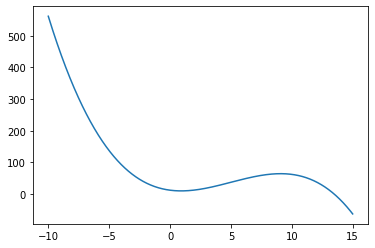

In [ ]:
plt.plot(x_plot,y_plot)

## 4.2 Finde ekstrempunkter

- Opstil ligning $F(x)$ som objekt `y`. Genbrug Sympy symbol (variabel) `x` fra opgave 3.
- Beregn $F'(x)$ eller $y'$ (afledede $F(x)$) og x-værdier i de 2 ekstrempunkter

- Brug en "sign chart" tilgang for at bestemme, om de to punkter er hhv. minimum/maksimum.

In [ ]:
y = -1/5 * x**3 + 6/2*x**2 - 5*x+12

In [ ]:
solve(diff(y),x)

[0.917517095361370, 9.08248290463863]

In [ ]:
sign_chart = [0,0.917,5,9.08,11] 

In [ ]:
[diff(y).subs(x,i) for i in sign_chart]

[-5,
 -0.00253339999999946,
 10.0000000000000,
 0.0121600000000015,
 -11.6000000000000]

## 4.3 - Find og plot tangentlinjen 

- Beregn den lineære ligning $t = mx+b$ der beskriver tangenten i $x_i = -5$
- Du skal først finde $y_{i}$
samt $m$ i $x_i$ og $b$


In [ ]:
y.subs(x,-5)

137.000000000000

In [ ]:
diff(y).subs(x,-5)

-50.0000000000000

In [ ]:
b = 137 + 50*-5

## 4.4 Tangentligning og Plot
plot $F(x)$ og $t(x)$ i $x = -5$
OBS: Brug x_plot / y_plot her

In [ ]:
t = -50*x_plot+b

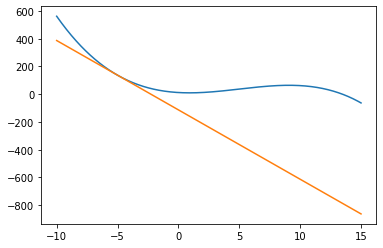

In [ ]:
plt.plot(x_plot,y_plot)
plt.plot(x_plot,t)